<a href="https://akademie.datamics.com/kursliste/">![title](bg_datamics_top.png)</a>

<center><em>© Datamics</em></center><br><center><em>Besuche uns für mehr Informationen auf <a href='https://akademie.datamics.com/kursliste/'>www.akademie.datamics.com</a></em>

# Bilder verschmelzen (blending) und Einfügen

Für manche Systeme der Computer Vision (Maschinellen Sehen) wollen wir über eine Möglichkeit verfügen, ein eigenes Bild auf einem existierenden Bild oder Video darzustellen. Wir wollen gegebenenfalls auch Bilder verschmelzen oder mit einem Markierungseffekt belegen, anstatt nur mit einer soliden Box oder einem leeren Rechteck.

Lasst uns dazu die von OpenCV zur Verfügung gestellten **Arithmetische Bildoperationen** (**Arithmetic Image Operations**) erkunden. Diese werden als Arithmetische Operationen bezeichnet, da OpenCV lediglich gebräuchliche  Mathematik auf Pixel anwendet, um Effekte zu erzielen. Wir werden ein wenig davon in unserem Code sehen.


## Bilder verschmelzen

Bilder verschmelzen ist an sich sehr einfach, lass uns hierzu ein einfaches Beispiel betrachten.

In [1]:
import cv2

In [2]:
# Zwei Bilder
img1 = cv2.imread('../DATA/dog_backpack.png')
img2 = cv2.imread('../DATA/watermark_no_copy.png')

In [3]:
img1.shape

(1401, 934, 3)

In [4]:
img2.shape

(1280, 1277, 3)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

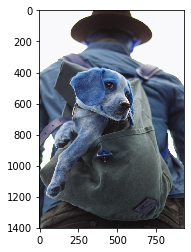

In [6]:
plt.imshow(img1)

Upps! Wir sollten daran denken, RGB zu reparieren!

In [7]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

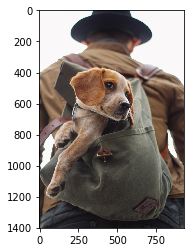

In [8]:
plt.imshow(img1)

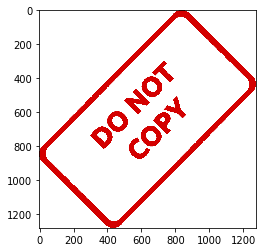

In [9]:
plt.imshow(img2)

### Bildgröße anpassen

In [10]:
img1 =cv2.resize(img1,(1200,1200))
img2 =cv2.resize(img2,(1200,1200))

Lass uns das Anpassen der Bildgröße üben, da das DO NOT COPY-Bild mit 1200 zu 1200 ziemlich groß ist und unser Welpe im Rucksack eine Größe von 1400 zu 1000 hat.

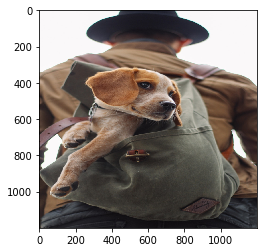

In [11]:
plt.imshow(img1)

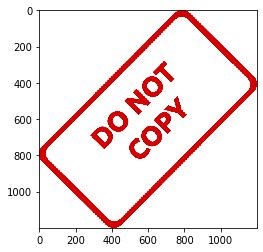

In [12]:
plt.imshow(img2)

### Das Bild verschmelzen

Wir werden die Werte verschelzen nach der Formel:

$$  img1 * \alpha  + img2 * \beta  + \gamma $$

In [13]:
img1.shape

(1200, 1200, 3)

In [14]:
img2.shape

(1200, 1200, 3)

In [15]:
blended = cv2.addWeighted(src1=img1,alpha=0.7,src2=img2,beta=0.3,gamma=0)

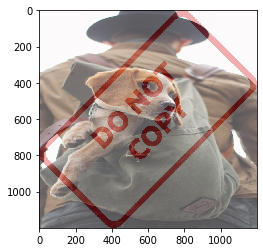

In [16]:
plt.imshow(blended)

-----

## Bilder verschiedener Größe überlagern

Wir können diesen schnellen Trick verwenden, um Bilder verschiedener Größe schnell zu überlagern, indem wir die Werte des größeren Bildes an die des kleineren Bildes anpassen.

In [17]:
# Lade zwei Bilder
img1 = cv2.imread('../DATA/dog_backpack.png')
img2 = cv2.imread('../DATA/watermark_no_copy.png')
img2 =cv2.resize(img2,(600,600))

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

large_img = img1
small_img = img2

In [18]:
x_offset=0
y_offset=0

In [19]:
large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img

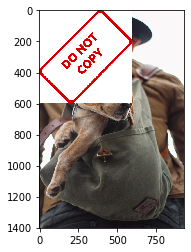

In [20]:
plt.imshow(large_img)

________
_______

## Bilder verschiedener Größe verschmelzen

### Importe

In [21]:
import numpy as np
import cv2

### Reimport der Bilder und Anpassung der Größe

In [22]:
# Lade zwei Bilder
img1 = cv2.imread('../DATA/dog_backpack.png')
img2 = cv2.imread('../DATA/watermark_no_copy.png')
img2 =cv2.resize(img2,(600,600))

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

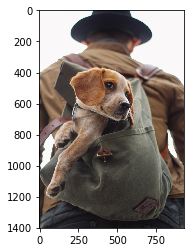

In [23]:
plt.imshow(img1)

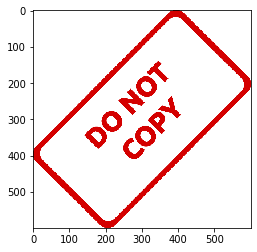

In [24]:
plt.imshow(img2)

### Erzeuge eine ROI Region of Interest (Region des Interesses)

In [25]:
img1.shape

(1401, 934, 3)

In [26]:
x_offset=934-600
y_offset=1401-600

In [27]:
# Erzeuge ein ROI mit der selben Größe wie das Vordergrundbild (das kleinere Bild, das oben liegen wird)
rows,cols,channels = img2.shape
# roi = img1[0:rows, 0:cols ] # OBERE LINKE ECKE
roi = img1[y_offset:1401,x_offset:943] # UNTERE RECHTE ECKE

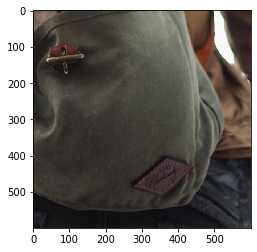

In [28]:
plt.imshow(roi)

In [29]:
roi.shape

(600, 600, 3)

### Eine Maske erzeugen

In [30]:
# Erzeuge jetzt eine Maske des Logos und erzeuge ebenfalls die invertierte Maske davon
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

In [31]:
img2gray.shape

(600, 600)

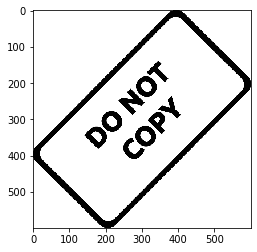

In [32]:
plt.imshow(img2gray,cmap='gray')

In [33]:
mask_inv = cv2.bitwise_not(img2gray)

In [34]:
mask_inv.shape

(600, 600)

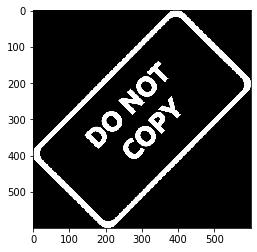

In [35]:
plt.imshow(mask_inv,cmap='gray')

## Konvertiere die Maske für 3 Kanäle

In [36]:
white_background = np.full(img2.shape, 255, dtype=np.uint8)

In [37]:
bk = cv2.bitwise_or(white_background, white_background, mask=mask_inv)

In [38]:
bk.shape

(600, 600, 3)

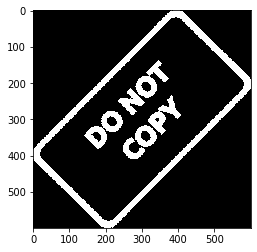

In [39]:
plt.imshow(bk)

### Nimm das originale Vordergrundbild und platziere es auf der Maske

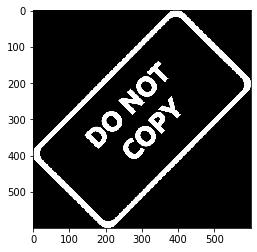

In [40]:
plt.imshow(mask_inv,cmap='gray')

In [41]:
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)

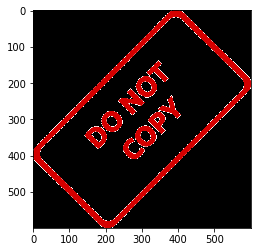

In [42]:
plt.imshow(fg)

In [43]:
fg.shape

(600, 600, 3)

### Erzeuge ein ROI und verschmelze die Maske mit dem ROI

In [44]:
final_roi = cv2.bitwise_or(roi,fg)

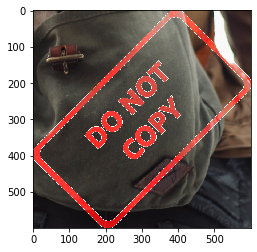

In [45]:
plt.imshow(final_roi)

### Füge jetzt den Rest des Bildes hinzu

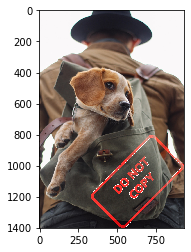

In [46]:
large_img = img1
small_img = final_roi


large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img

plt.imshow(large_img)

### Gut gemacht!

Wirf einen Blick auf die folgenden Dokumentationsbeispiele und Links für weitere Hilfe mit dieser Art von Aufgabenstellungen (die recht kompliziert sein können!)

1. https://stackoverflow.com/questions/10469235/opencv-apply-mask-to-a-color-image/38493075
2. https://stackoverflow.com/questions/14063070/overlay-a-smaller-image-on-a-larger-image-python-opencv
3. https://docs.opencv.org/3.4/d0/d86/tutorial_py_image_arithmetics.html